In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import missingno as msno

In [18]:
folder_path="./data/*.csv"

csv_files=glob.glob(folder_path)

dfs=[pd.read_csv(csv_file) for csv_file in csv_files]

In [19]:
print("Data dimensions: ")
for i, d in enumerate(dfs, start=1):
  rows,cols=d.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [20]:
df=pd.concat(dfs, ignore_index=True)
rows,cols=df.shape

print("New dimensions: ")
print("No of rows: %i\nNo of columns: %i\nTotal Cells: %i"%(rows,cols,rows*cols))

New dimensions: 
No of rows: 2830743
No of columns: 79
Total Cells: 223628697


In [21]:
for d in dfs: del d

In [22]:
col_names={col: col.strip() for col in df.columns}
df.rename(columns=col_names, inplace=True)

In [23]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [25]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
df.describe().transpose()

Overview of Columns:


d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count          mean           std  \
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.059493e+02  6.052568e+02   
Fwd Header Length.1          2830743.0 -2.599739e+04  2.105286e+07   
Fwd Avg Bytes/Bulk           2830743.0  0.0

In [26]:
pd.options.display.max_columns = 80
df

Destination Port  Flow Duration  Total Fwd Packets  \
0                   54865              3                  2   
1                   55054            109                  1   
2                   55055             52                  1   
3                   46236             34                  1   
4                   54863              3                  2   
...                   ...            ...                ...   
2830738                53          32215                  4   
2830739                53            324                  2   
2830740             58030             82                  2   
2830741                53        1048635                  6   
2830742                53          94939                  4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             1                            6   
2                             1                            6   
3                             1                            6   
4                             0                           12   
...                         ...                          ...   
2830738                       2                          112   
2830739                       2                           84   
2830740                       1                           31   
2830741                       2                          192   
2830742                       2                          188   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                  6                      6   
2                                  6                      6   
3                                  6                      6   
4                                  0                      6   
...                              ...                    ...   
2830738                          152                     28   
2830739                          362                     42   
2830740                            6                     31   
2830741                          256                     32   
2830742                          226                     47   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                     6.0                0.00000   
1                            6                     6.0                0.00000   
2                            6                     6.0                0.00000   
3                            6                     6.0                0.00000   
4                            6                     6.0                0.00000   
...                        ...                     ...                    ...   
2830738                     28                    28.0                0.00000   
2830739                     42                    42.0                0.00000   
2830740                      0                    15.5               21.92031   
2830741                     32                    32.0                0.00000   
2830742                     47                    47.0                0.00000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                     0.0   
1                            6                      6                     6.0   
2                            6                      6                     6.0   
3                            6                      6                     6.0   
4                            0                      0                     0.0   
...                        ...                    ...                     ...   
2830738                     76                     76                    76.0   
2830739                    181                    181                   181.0   
2830740                 

## Data Cleaning

In [27]:
dups = df[df.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [28]:
df.drop_duplicates(inplace = True)
df.shape

(2522362, 79)

In [29]:
df = df.loc[:, ~df.columns.duplicated()]


missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [30]:
# Checking for infinity values
numeric_cols = df.select_dtypes(include = np.number).columns
inf_count = np.isinf(df[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [31]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {df.isna().sum().sum()}')

df.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {df.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [32]:
missing = df.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [33]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(df)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


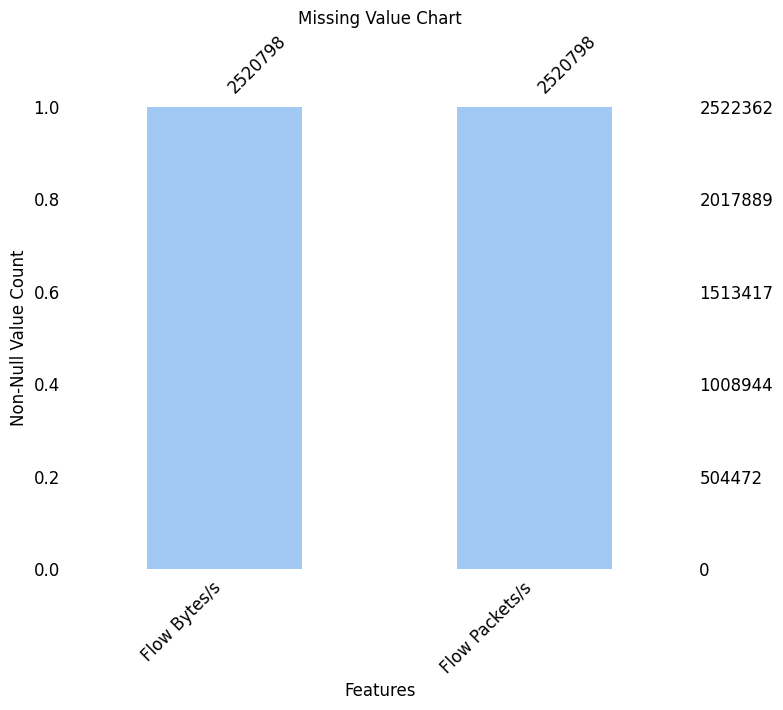

In [34]:
sns.set_palette('pastel')
missing_vals = df.columns[df.isna().any()].tolist()
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted width for better visibility
msno.bar(df[missing_vals], ax=ax, fontsize=12, color=sns.color_palette("pastel")[0])
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=12)
plt.show()

### Dealing with missing values (cols with missing data)

In [35]:
# to deal with missing values in destination port column, we will just drop the rows that don't have the destination port
df.dropna(subset=['Destination Port'], inplace=True)

In [36]:
# recheck missing values

missing_val = df.isna().sum()
print(missing_val[missing_val>0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


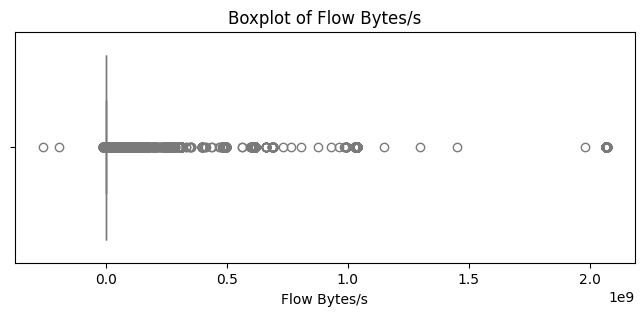

In [37]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = df['Flow Bytes/s'])
plt.title('Boxplot of Flow Bytes/s')
plt.show()

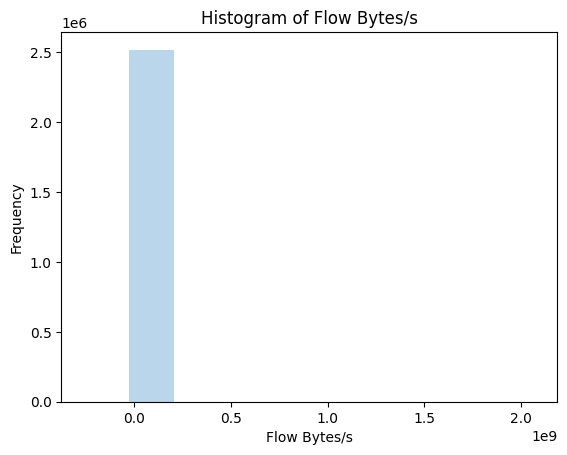

In [38]:
colors = sns.color_palette('Blues')
plt.hist(df['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

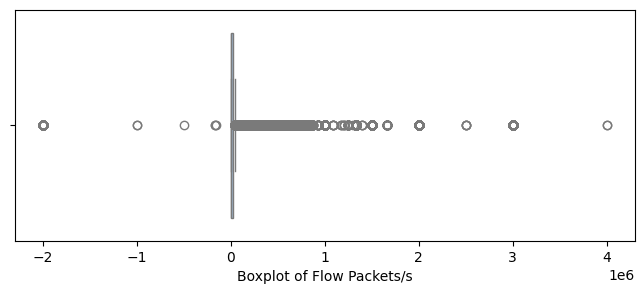

In [39]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = df['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

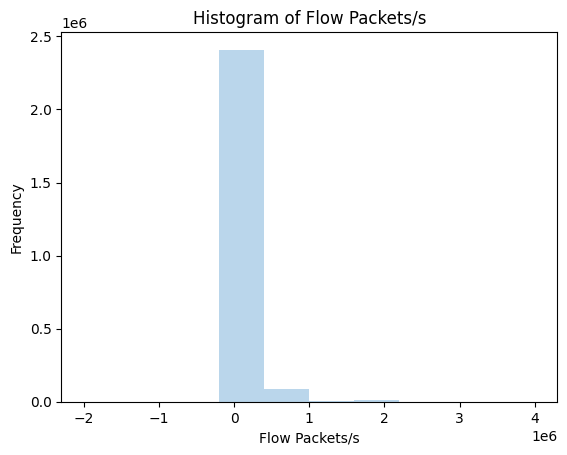

In [40]:
colors = sns.color_palette('Blues')
plt.hist(df['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [41]:
med_flow_bytes = df['Flow Bytes/s'].median()
med_flow_packets = df['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [42]:
# replace missing values in the columns with the median values

df.fillna({'Flow Bytes/s': med_flow_bytes, 'Flow Packets/s': med_flow_packets}, inplace=True)

In [43]:
print('Number of \'Flow Bytes/s\' missing values:', df['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', df['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


### 2.3 Analysing Patterns using Visualisations

In [44]:
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [45]:
# Types of attacks & normal instances (BENIGN)
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [46]:
# Creating a dictionary that maps each label to its attack type
attack_map={
  "BENIGN":"BENIGN",
"DoS Hulk":"DoS",
"PortScan":"Port Scan",
"DoS GoldenEye":"DoS",
"FTP-Patator":"Brute Force",
"DoS slowloris":"DoS",
"DoS Slowhttptest":"DoS",
"SSH-Patator":"Brute Force",
"Bot":"Bot",
"Web Attack � Brute Force":"Web Attack",
"Web Attack � XSS":"Web Attack",
"Infiltration":"Web Attack",
"Web Attack � Sql Injection":"Web Attack ",
"Heartbleed":"Heartbleed ",
}

df['Attack Type'] = df['Label'].map(attack_map)

In [47]:
df['Attack Type'].value_counts()

Attack Type
BENIGN         2096484
DoS             193748
Port Scan        90819
Brute Force       9152
Web Attack        2158
Bot               1953
Web Attack          21
Heartbleed          11
Name: count, dtype: int64

In [48]:
df.drop('Label', axis = 1, inplace = True)

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack Number'] = le.fit_transform(df['Attack Type'])

print(df['Attack Number'].unique())

[0 8 5 1 6 7 2 3 4]


In [50]:
# Printing corresponding attack type for each encoded value
encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DoS
4: Heartbleed 
5: Port Scan
6: Web Attack
7: Web Attack 
8: nan


In [51]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

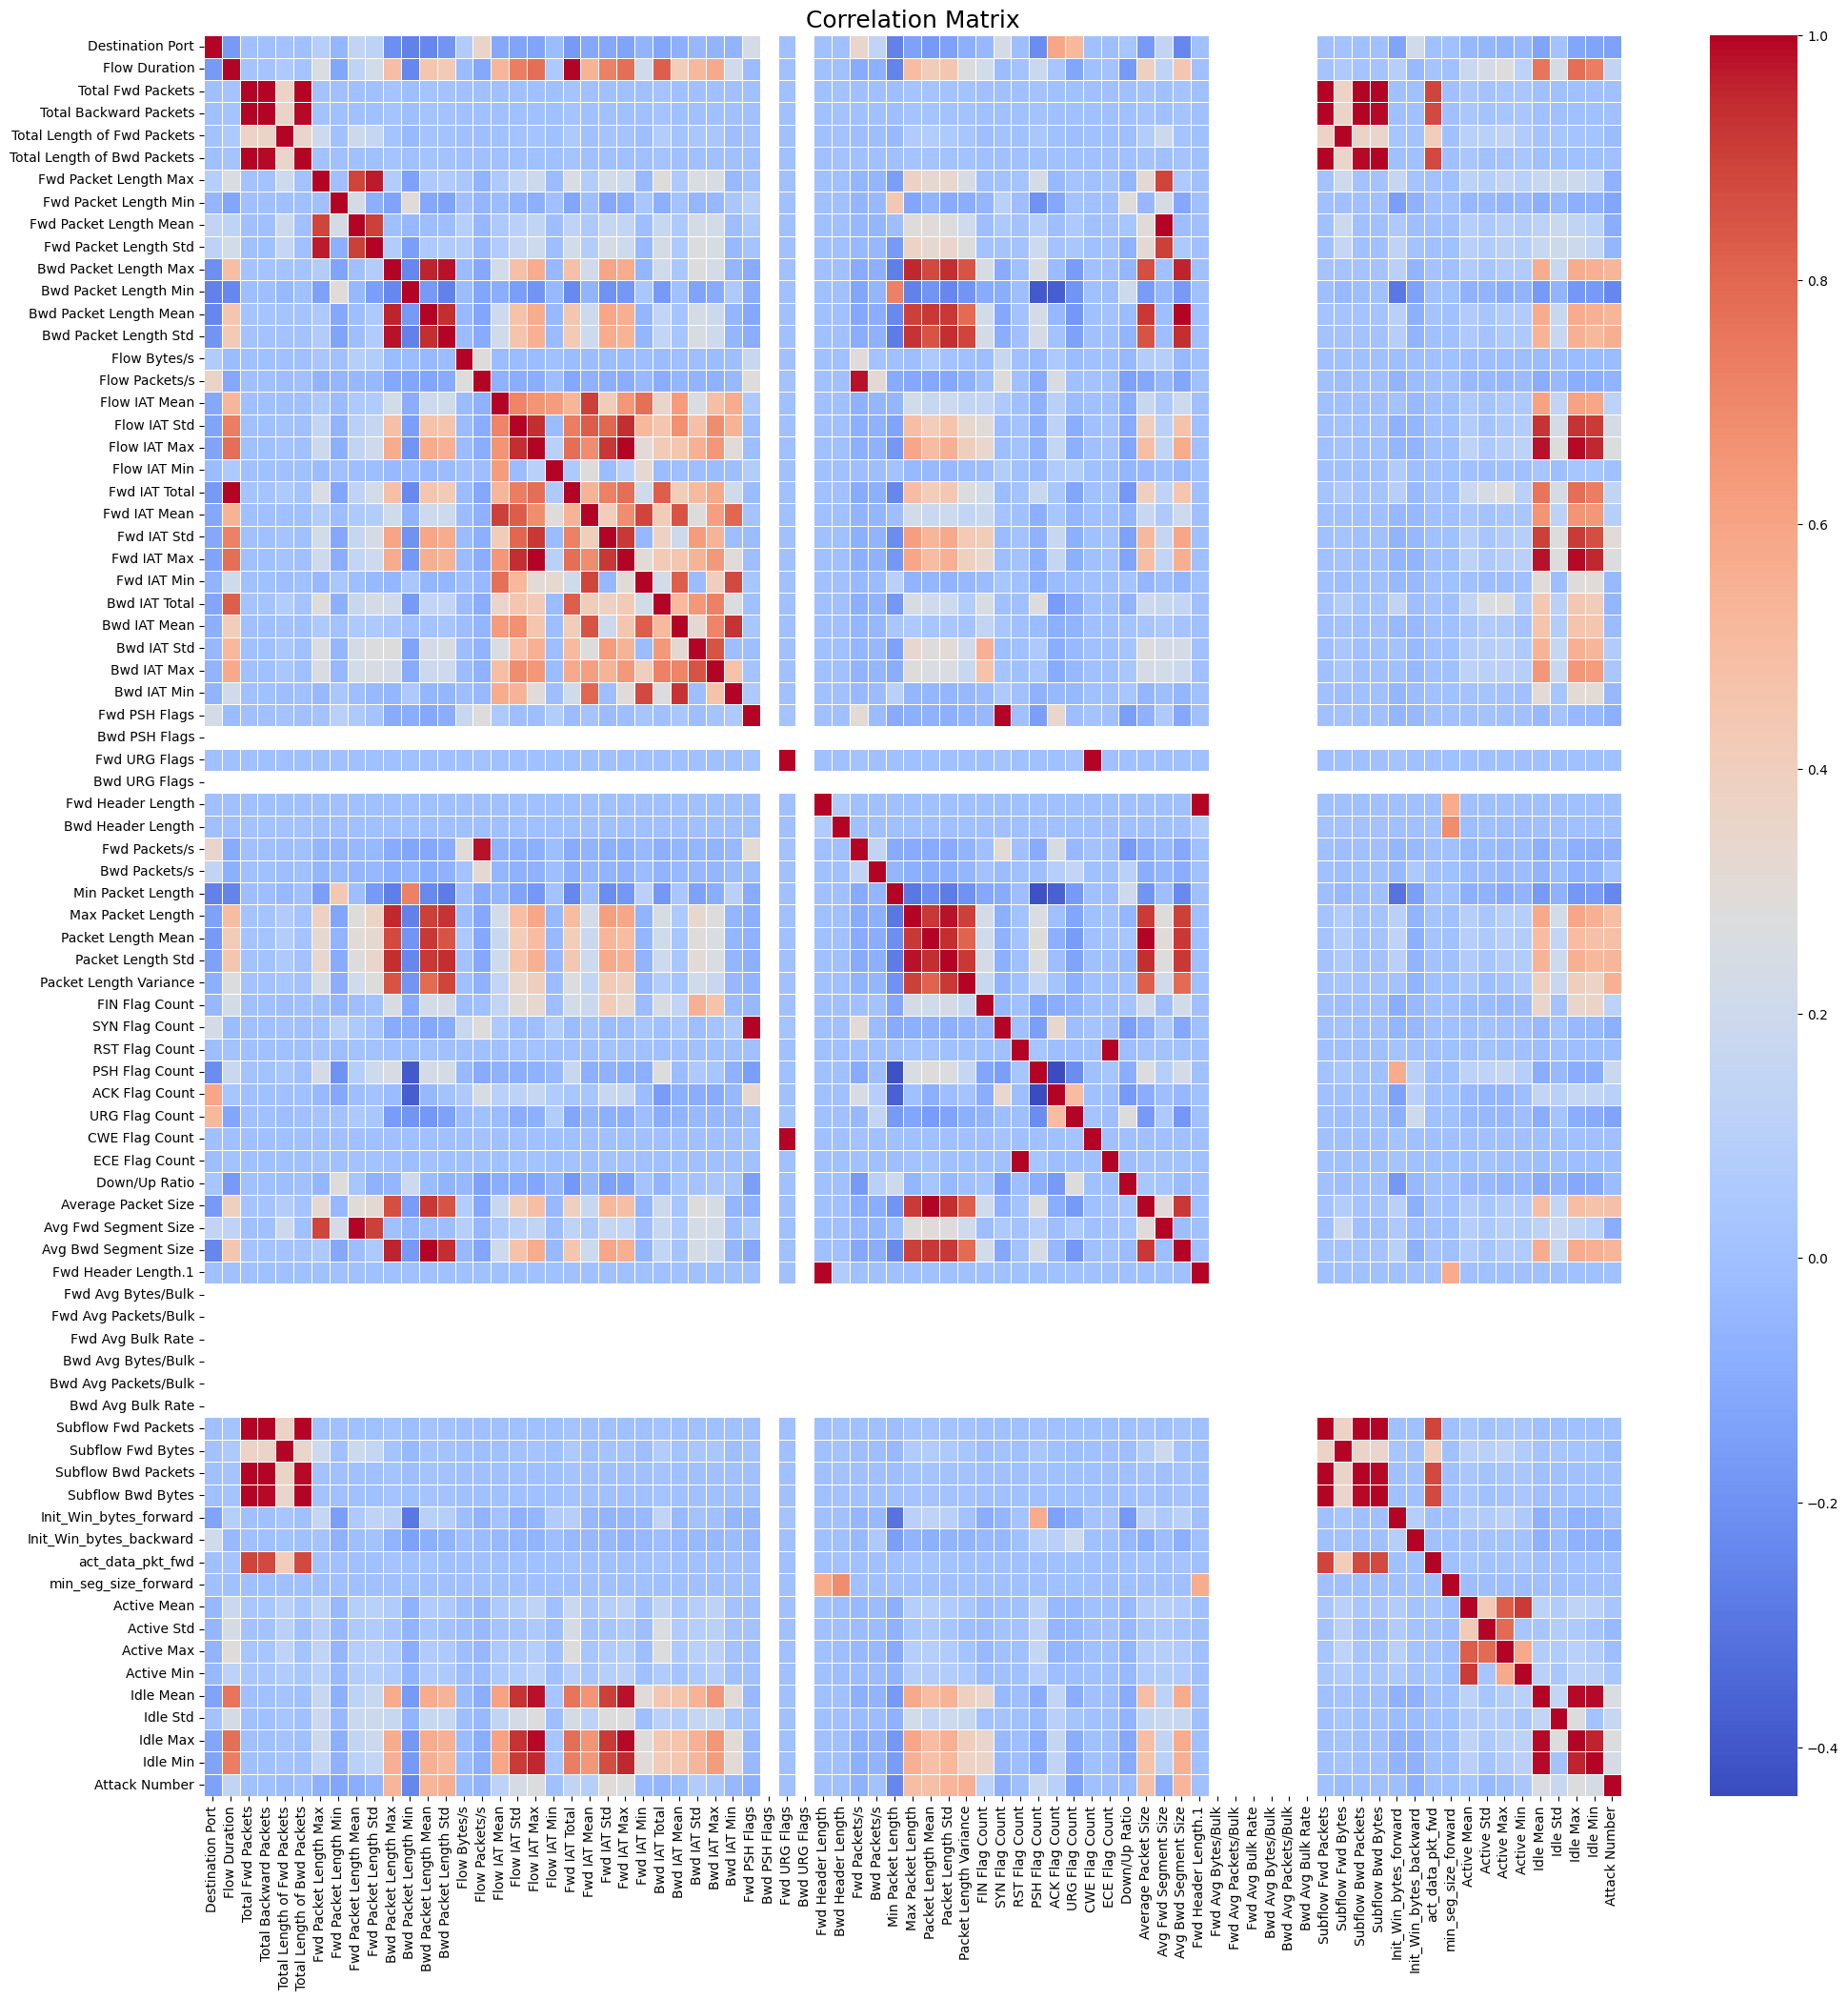

In [52]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [53]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.14
2.  Bwd Packet Length Max    :0.53
3.  Bwd Packet Length Mean   :0.53
4.  Bwd Packet Length Std    :0.56
5.  Flow IAT Mean            :0.12
6.  Flow IAT Std             :0.24
7.  Flow IAT Max             :0.27
8.  Fwd IAT Total            :0.14
9.  Fwd IAT Mean             :0.09
10. Fwd IAT Std              :0.3
11. Fwd IAT Max              :0.27
12. Bwd IAT Std              :0.07
13. Bwd IAT Max              :0.04
14. Bwd Packets/s            :0.01
15. Max Packet Length        :0.49
16. Packet Length Mean       :0.48
17. Packet Length Std        :0.53
18. Packet Length Variance   :0.55
19. FIN Flag Count           :0.12
20. PSH Flag Count           :0.18
21. ACK Flag Count           :0.1
22. Average Packet Size      :0.48
23. Avg Bwd Segment Size     :0.53
24. Active Mean              :0.03
25. Active Min               :0.04
26. Idle Mean                :0.26
27. Idle Std                 :0.17

In [54]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 29


In [55]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = df.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [56]:
# Data sampling for data analysis
sample_size = int(0.2 * len(df)) # 20% of the original size
sampled_data = df.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [57]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = df[col].describe()['mean']
    new = sampled_data[col].describe()['mean']
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8709.619693           0.06%
Flow Duration                   16581323.773163       16664541.182583       0.50%
Total Fwd Packets               10.276271             11.801783             14.84%
Total Backward Packets          11.565964             13.671102             18.20%
Total Length of Fwd Packets     611.575108            609.676051            0.31%
Total Length of Bwd Packets     18133.153930          22797.828210          25.72%
Fwd Packet Length Max           231.091768            233.184968            0.91%
Fwd Packet Length Min           19.194641             19.227202             0.17%
Fwd Packet Length Mean          63.470104             63.967652             0.78%
Fwd Packet Length Std 

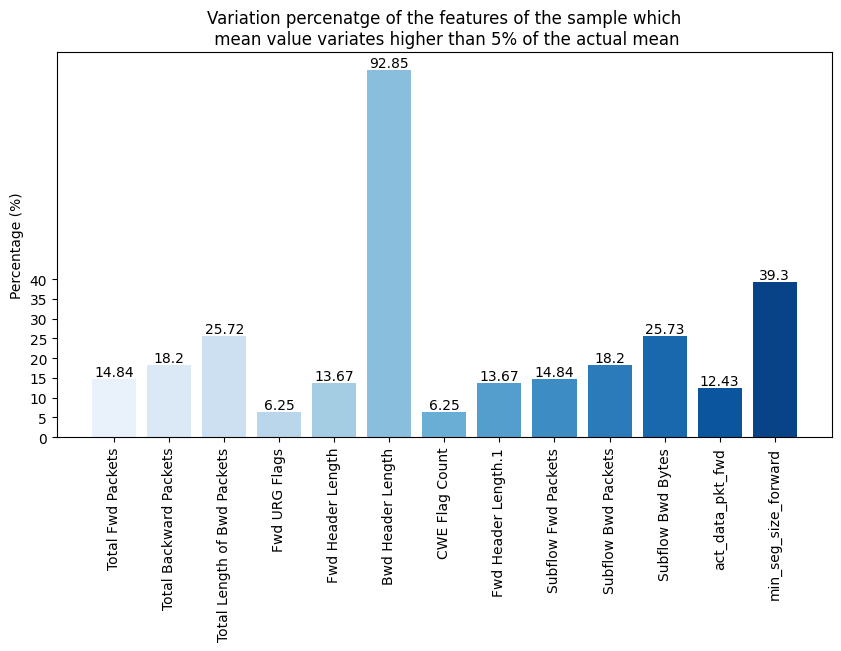

In [58]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [59]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33264
2.  Flow Duration                 : 256319
3.  Total Fwd Packets             : 683
4.  Total Backward Packets        : 838
5.  Total Length of Fwd Packets   : 9099
6.  Total Length of Bwd Packets   : 24229
7.  Fwd Packet Length Max         : 3686
8.  Fwd Packet Length Min         : 242
9.  Fwd Packet Length Mean        : 35277
10. Fwd Packet Length Std         : 66362
11. Bwd Packet Length Max         : 3888
12. Bwd Packet Length Min         : 450
13. Bwd Packet Length Mean        : 45979
14. Bwd Packet Length Std         : 62866
15. Flow Bytes/s                  : 347114
16. Flow Packets/s                : 288254
17. Flow IAT Mean                 : 274064
18. Flow IAT Std                  : 229405
19. Flow IAT Max                  : 166881
20. Flow IAT Min                  : 45911
21. Fwd IAT Total                 : 119286
22. Fwd IAT Mean                  : 164137
23. Fwd IAT Std                   : 148396
24. Fwd IAT

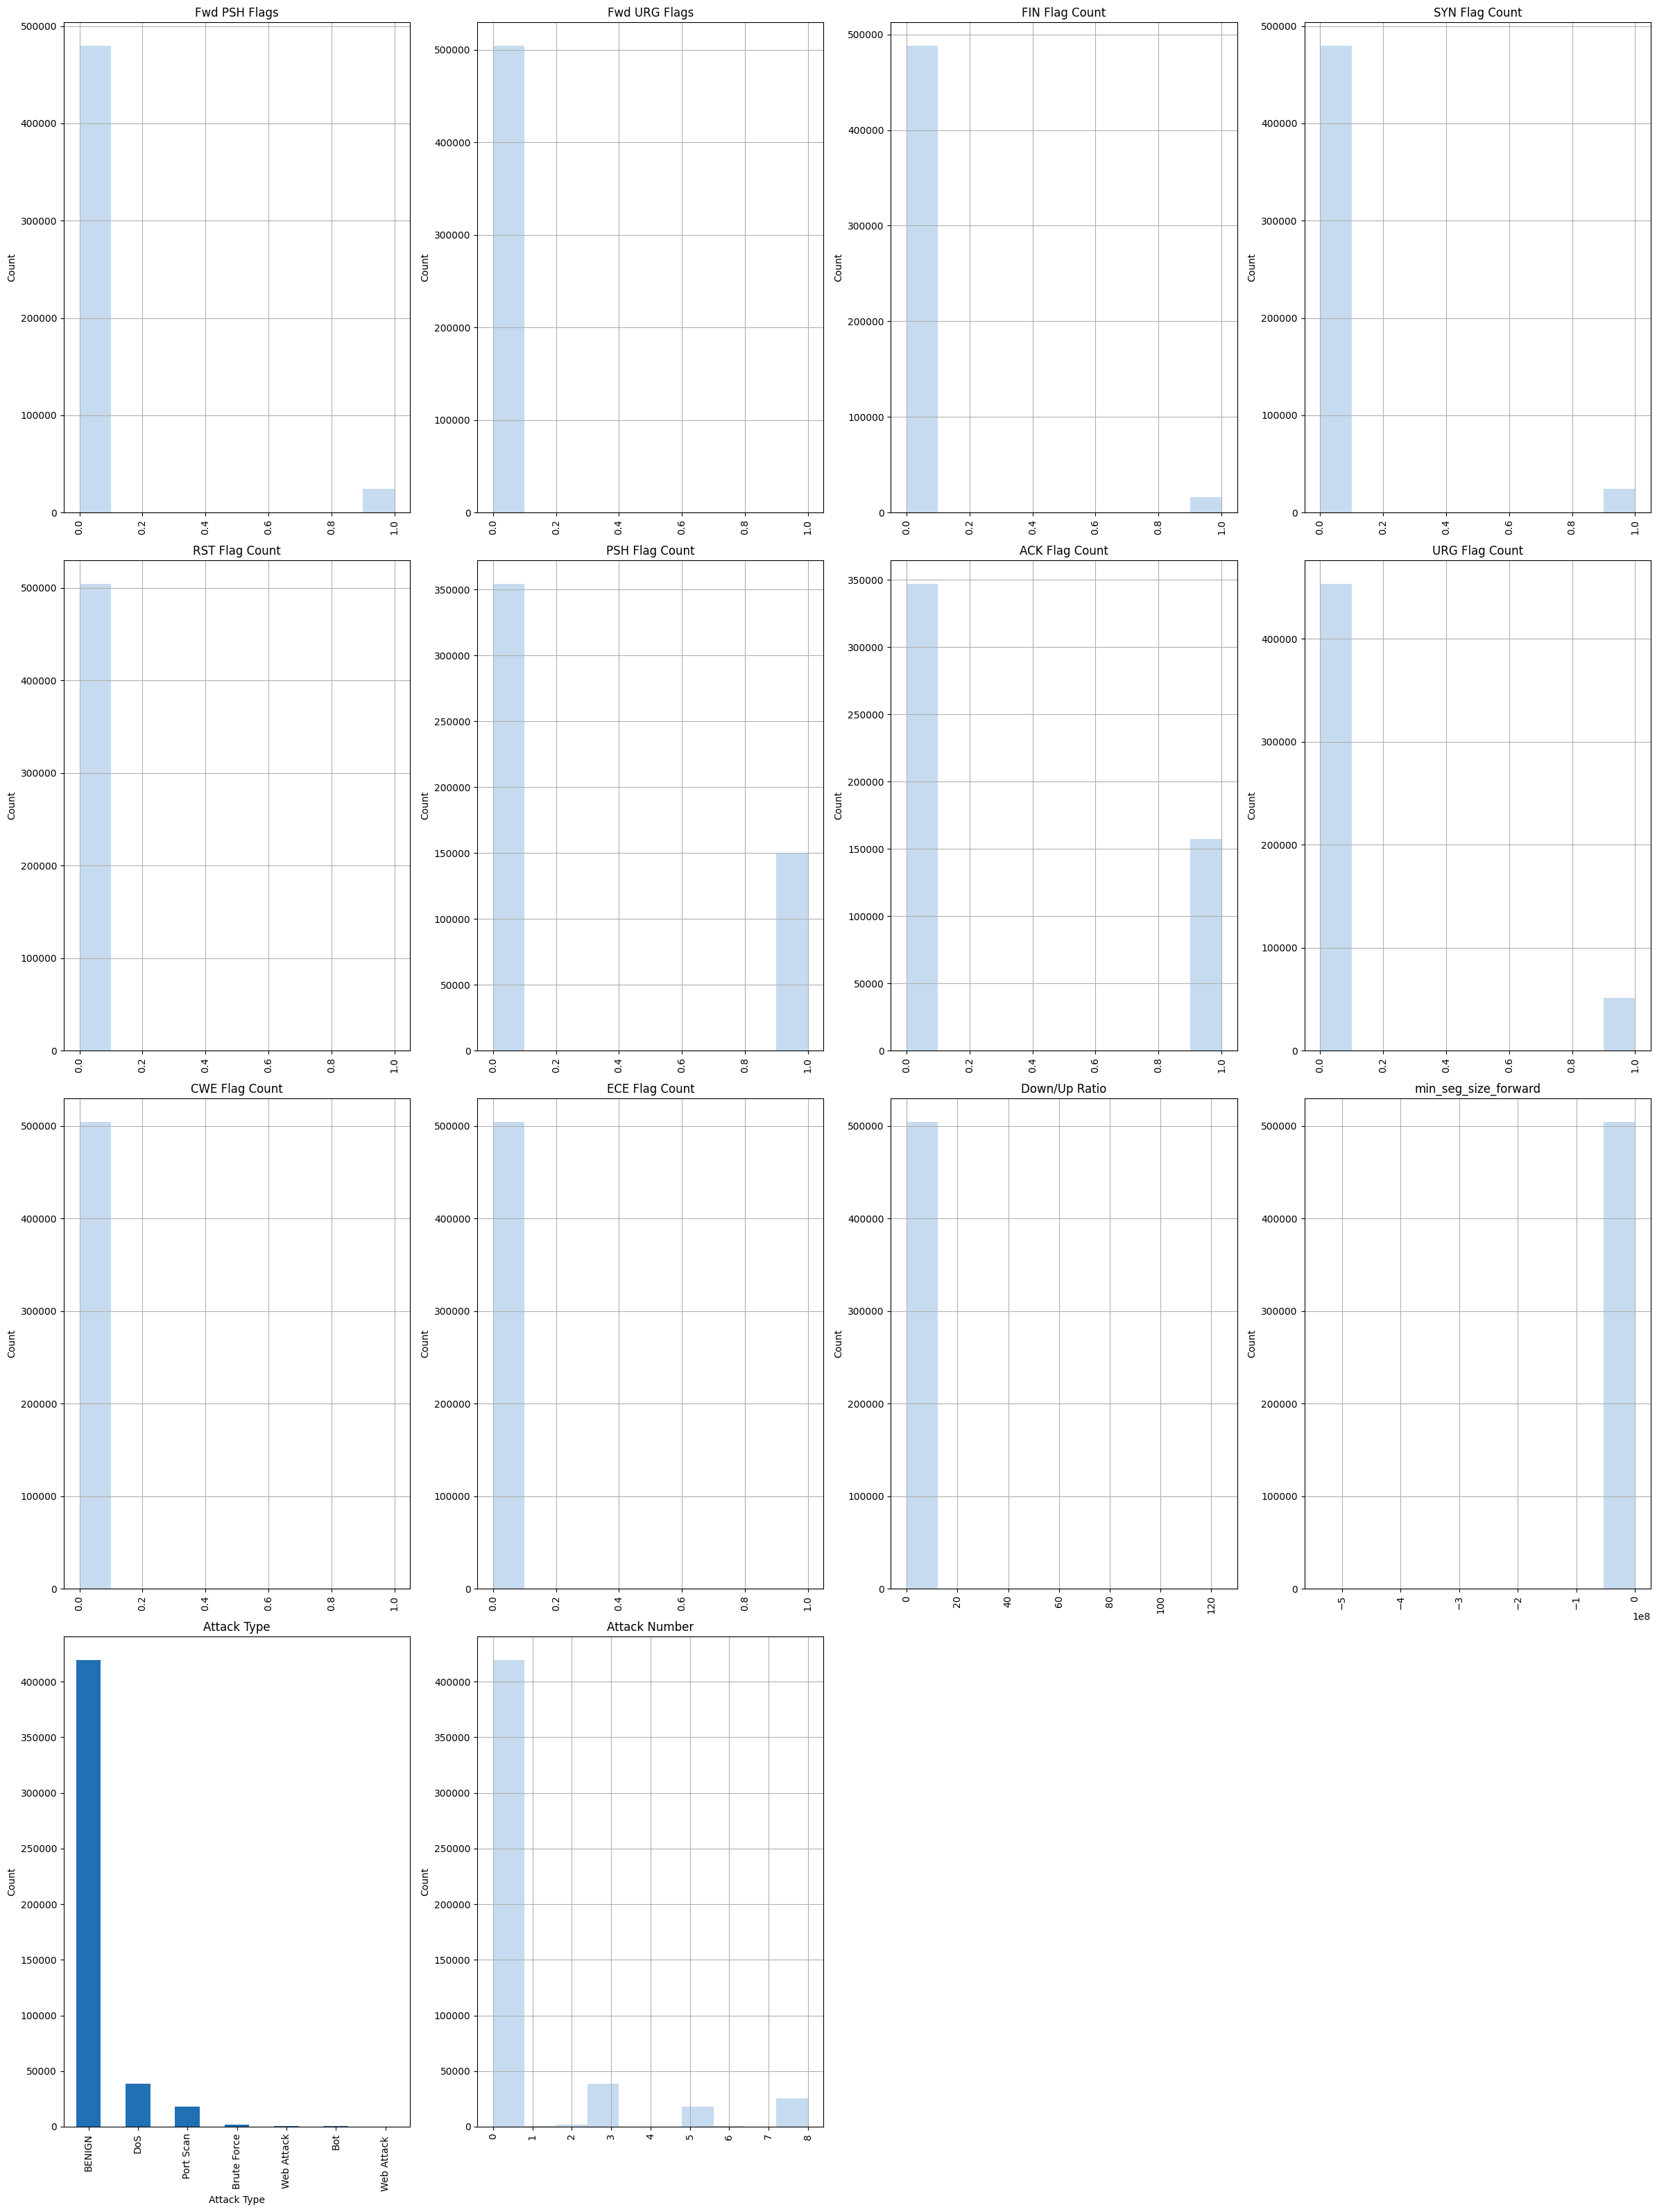

In [60]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [61]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


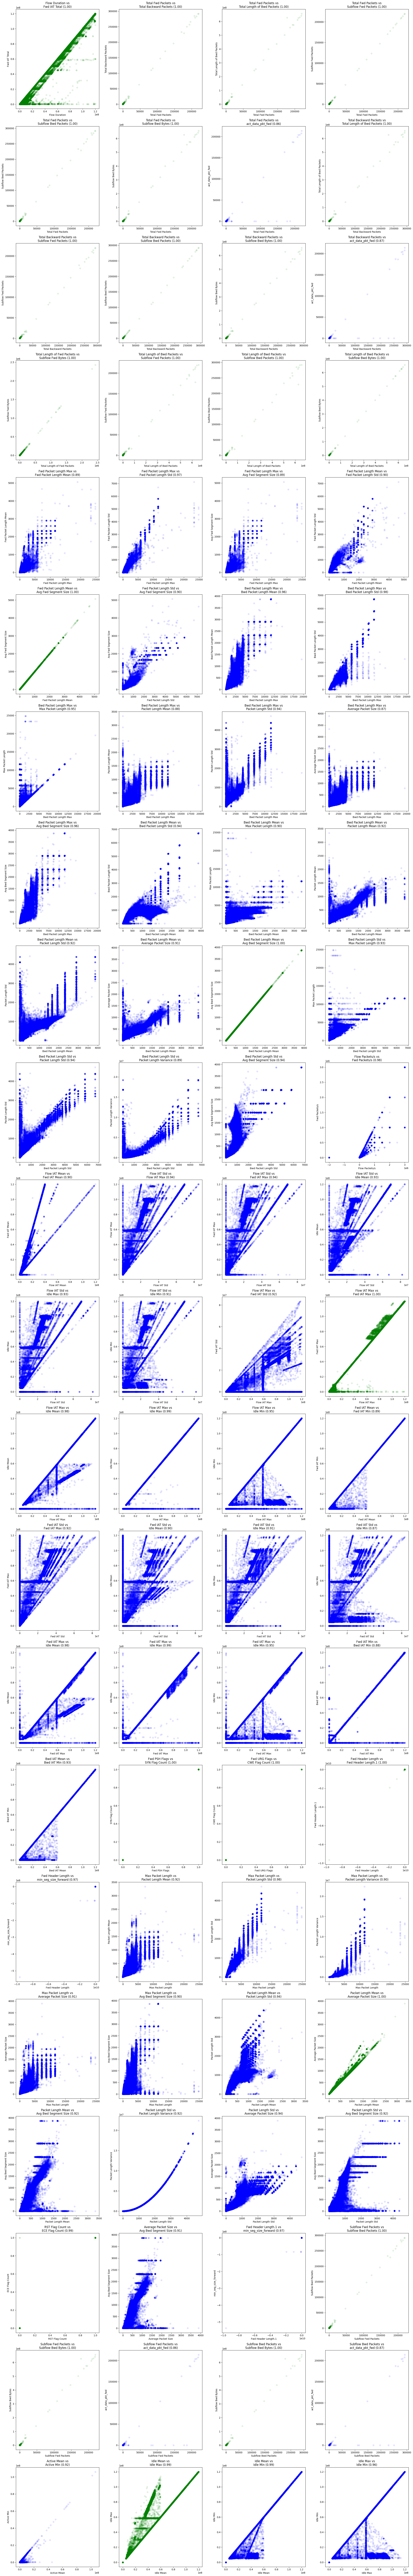

In [62]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [63]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
df.drop('Attack Number', axis = 1, inplace = True)

In [64]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109264               21.66
Flow Duration                        94059               18.65
Total Fwd Packets                    50548               10.02
Total Backward Packets               47917                9.50
Total Length of Fwd Packets          62997               12.49
Total Length of Bwd Packets         114946               22.79
Fwd Packet Length Max                48745                9.66
Fwd Packet Length Min                 2611                0.52
Fwd Packet Length Mean               35787                7.09
Fwd Packet Length Std                47276                9.37
Bwd Packet Length Max                75002               14.87
Bwd Packet Length Min                13507                2.68
Bwd Packet Length Mean               87556               17.36
Bwd Packet Length Std                89801               17.80
Flow Bytes/s                         95014             

In [65]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

IndexError: index 0 is out of bounds for axis 0 with size 0

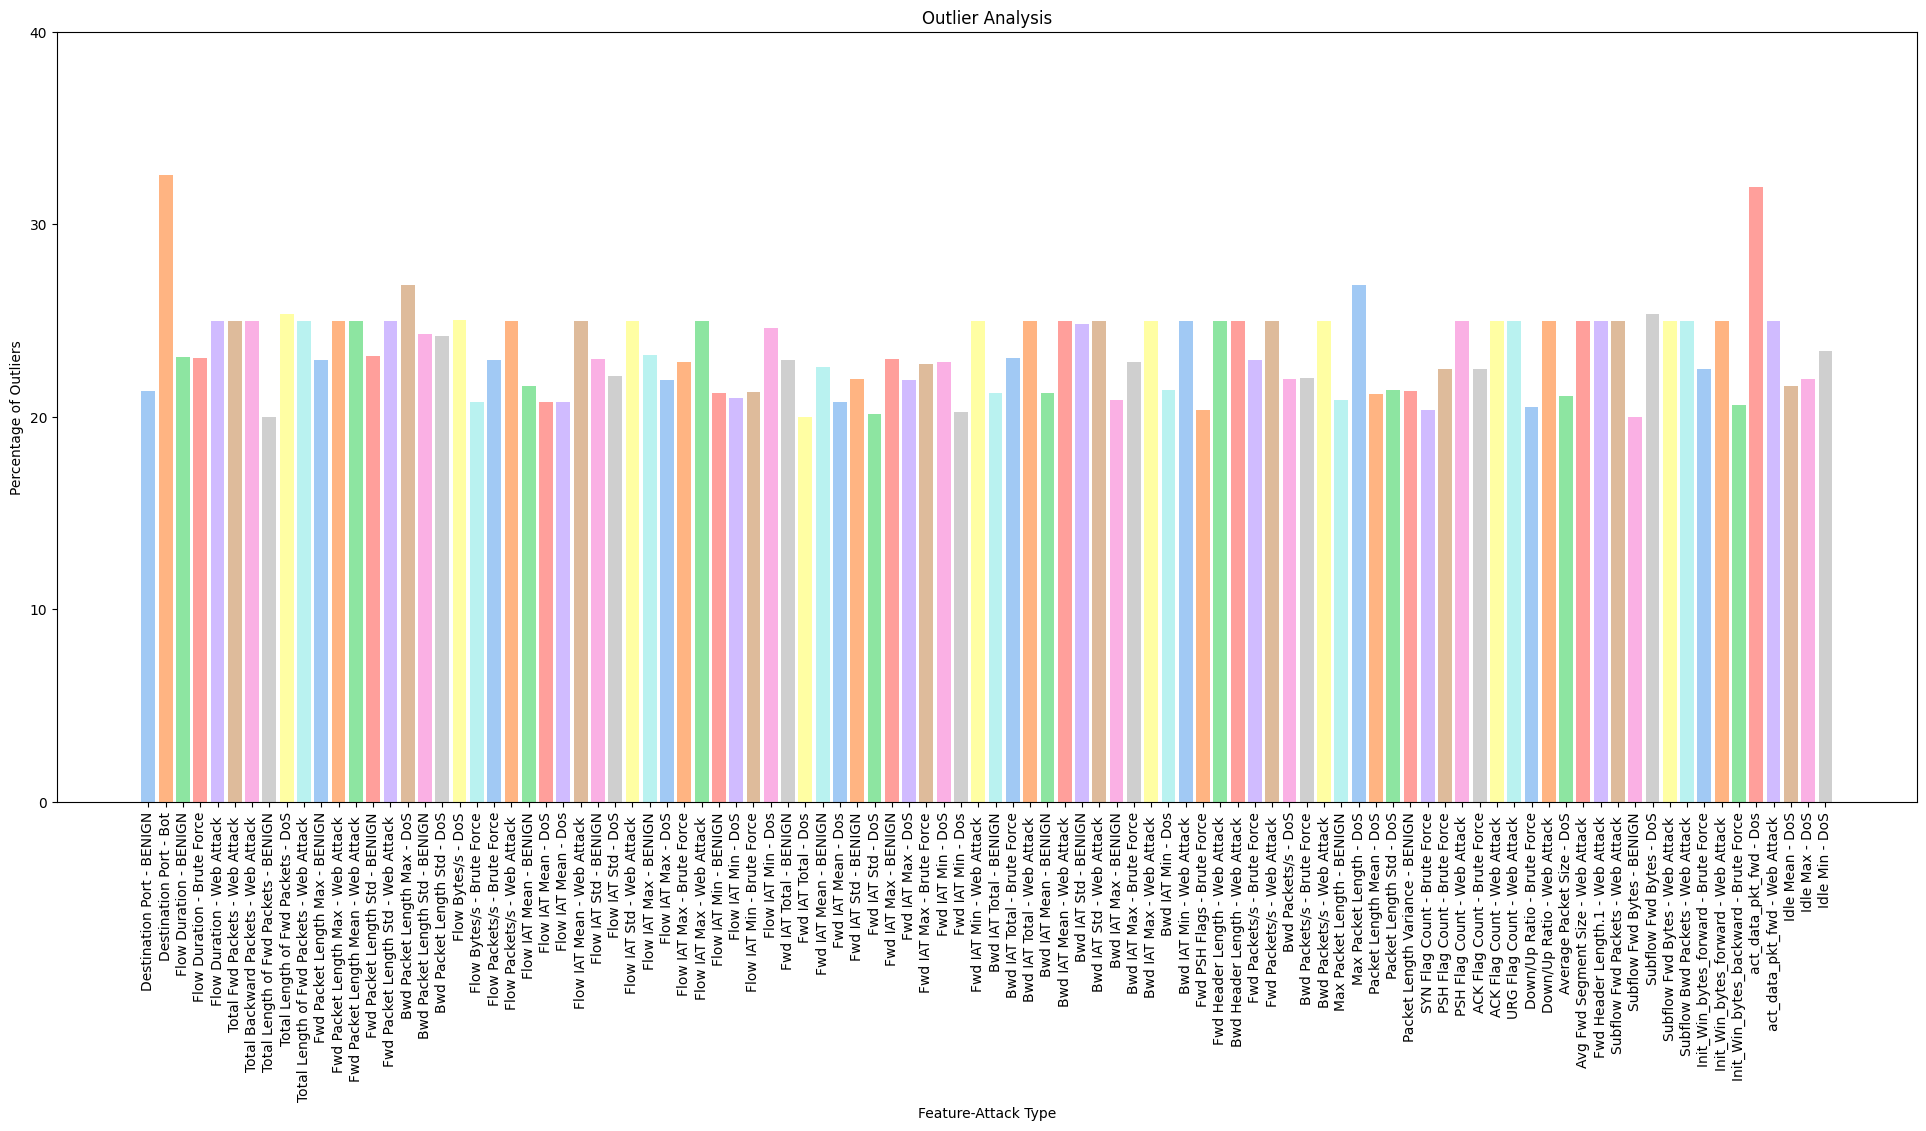

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

#### Visualization of column relationships (Categorical Variables)

C:\Users\aayus\AppData\Local\Temp\ipykernel_2724\2043510913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


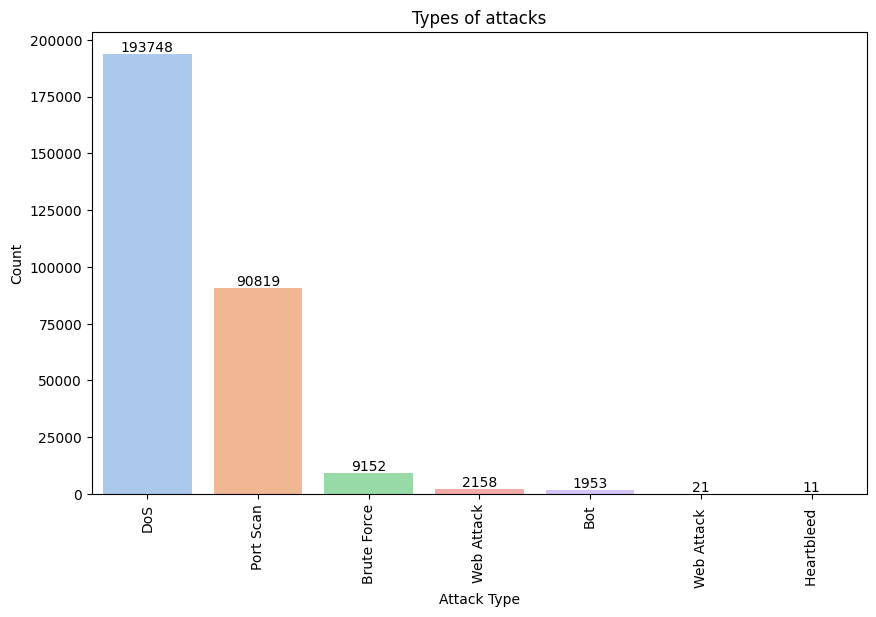

In [66]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = df.loc[df['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

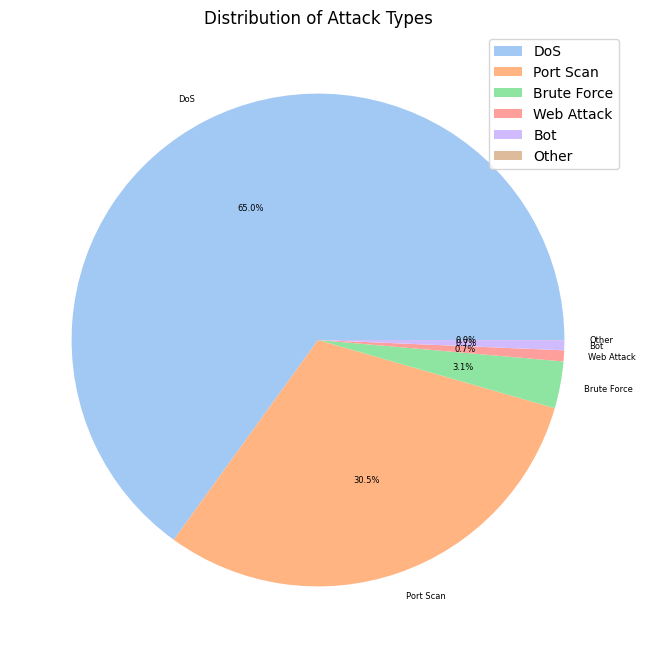

In [67]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [69]:
df.groupby('Attack Type').first()

Destination Port  Flow Duration  Total Fwd Packets  \
Attack Type                                                       
BENIGN                  54865              3                  2   
Bot                      8080       60202640                  9   
Brute Force                80        5216127                  3   
DoS                        80        5169956                  8   
Heartbleed                444      119302728               2685   
Port Scan                  80        5021059                  6   
Web Attack                444       42664070                  5   
Web Attack                 80        5006127                  4   

             Total Backward Packets  Total Length of Fwd Packets  \
Attack Type                                                        
BENIGN                            0                           12   
Bot                               9                          322   
Brute Force                       1                            0   
DoS                               6                         1101   
Heartbleed                     1729                         8299   
Port Scan                         5                          703   
Web Attack                        6                          141   
Web Attack                        4                          447   

             Total Length of Bwd Packets  Fwd Packet Length Max  \
Attack Type                                                       
BENIGN                                 0                      6   
Bot                                  256                    322   
Brute Force                            0                      0   
DoS                                 4222                    410   
Heartbleed                       7556917                    517   
Port Scan                           1414                    356   
Web Attack                           291                     93   
Web Attack                           530                    447   

             Fwd Packet Length Min  Fwd Packet Length Mean  \
Attack Type                                                  
BENIGN                           6                6.000000   
Bot                              0               35.777778   
Brute Force                      0                0.000000   
DoS                              0              137.625000   
Heartbleed                       0                3.090875   
Port Scan                        0              117.166667   
Web Attack                       0               28.200000   
Web Attack                       0              111.750000   

             Fwd Packet Length Std  Bwd Packet Length Max  \
Attack Type                                                 
BENIGN                    0.000000                      0   
Bot                     107.333333                    256   
Brute Force               0.000000                      0   
DoS                     185.758628                   3525   
Heartbleed               16.858421                  17376   
Port Scan               181.536131                   1050   
Web Attack               38.861292                    267   
Web Attack              223.500000                    530   

             Bwd Packet Length Min  Bwd Packet Length Mean  \
Attack Type                                                  
BENIGN                           0                0.000000   
Bot                              0               28.444444   
Brute Force                      0                0.000000   
DoS                              0              703.666667   
Heartbleed                       0             4370.686524   
Port Scan                        0              282.800000   
Web Attack                       0               48.500000   
Web Attack                       0              132.500000   

             Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  \
Attack Type                                                        
B

## 3. Data Preprocessing

In [71]:
# For improving performance and reduce memory-related errors
old_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in df.columns:
    col_type = df[col].dtype
    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)

new_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [72]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow 

In [75]:
df.describe().transpose()

count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347011e+01  1.955015e+02   
Fwd Packet Length Std        2522362.0  7.727760e+01  2.967953e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404131e+02  6.324238e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.808314e+02   
Flow Bytes/s                 2522362.0  1.409834e+06  2.656263e+07   
Flow Packets/s               2522362.0  4.726262e+04  2.025771e+05   
Flow IAT Mean                2522362.0  1.445246e+06  4.681883e+06   
Flow IAT Std                 2522362.0  3.276120e+06  8.454525e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917447e+06  1.001355e+07   
Fwd IAT Std                  2522362.0  3.666367e+06  1.013934e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.390609e+06   
Bwd IAT Std                  2522362.0  1.667647e+06  6.628390e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083435e+04  1.932083e+05   
Bwd Packets/s                2522362.0  6.509474e+03  3.813312e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905414e+02  3.182915e+02   
Packet Length Std            2522362.0  3.299987e+02  6.607344e+02   
Packet Length Variance       2522362.0  5.454382e+05  1.735993e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.454353e+02   
Avg Fwd Segment Size         2522362.0  6.347011e+01  1.955015e+02   
Avg Bwd Segment Size         2522362.0  3.404131e+02  6.324238e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [80]:
# Dropping columns with only one unique value
num_unique = df.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
df = df[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [81]:
df.shape

(2522362, 71)

In [82]:
# Columns after removing non variant columns
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

- To improve performance and reduce the risk of memory-related errors (mostly session crashes), we downcasted the float and integer values based on the presence of the minimum and maximum values and reduced memory usage by 47.5%.

- The columns with zero standard deviation have the same value in all rows.
These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns. These columns cannot help differentiate between the classes or groups of data. So, we dropped the columns that have no variation.

### Applying PCA to reduce dimensions

A simple and effective way to reduce the dimensionality of the dataset and improve the performance of the model is to use strongly correlated features. We used label encoding on the target feature where the numerical values assigned to each category do not have inherent meaning and they are arbitrary. For this reason, the correlation matrix calculated using label-encoded variables may not accurately reflect the true relationships between the variables.

So, a more flexible approach to feature selection can be PCA. PCA is a technique that transforms original set of variables into a smaller set of uncorrelated variables, called principal components.

PCA can capture more complex relationships between variables that may not be evident from correlation matrix analysis. It can also help to reduce the risk of overfitting.

Here, we applied Incremental PCA. Incremental PCA is a variant of PCA that allows for the efficient computation of principal components of a large dataset that cannot be stored in memory.

We applied StandardScaler before performing Incremental PCA to standardize the data values into a standard format.


In [84]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = df.drop('Attack Type', axis = 1)
attacks = df['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [85]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.23%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data